In [5]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
import pandas as pd
import sys
import getpass
from functions import *
np.set_printoptions(precision=2)
pd.set_option('precision', 2)
%matplotlib inline
matplotlib.style.use('ggplot')

In [15]:
df = pd.read_csv('C:\Users\\'+getpass.getuser()+'\\Google Drive\Sarah Ido folder\data\CCK\MATCHING_phet_cck_user_actions+sophistication_WITHPAUSE_anonymized.txt')
df_scores = pd.read_csv('C:\Users\\'+getpass.getuser()+'\\Google Drive\Sarah Ido folder\data\CCK\MATCHING_phet_cck_user_data_anonymized.txt')
df["student"] = df["student"].astype('category')
df_scores["student"] = df_scores["student"].astype('category')
df["Family"]=df["Family"].str.capitalize()

def remodel_families(row):
    if row["Family"] == "Build" or row["Family"] == "Revise":  # or row["Family"] == "Extra":
        if row["Outcome"] != "None":
            return "ConstructWithFeedback"
        else:
            return "Construct"
    else:
        return row["Family"]
    
df['Family'] = df.apply (lambda row: remodel_families (row),axis=1)

In [89]:
ACTIONS_TO_REMOVE = ['I','O','S']
ACTIVITY = 'a2'
events = [e for e in ["T","S","O","F","P","I","E","X","C",] if e not in ACTIONS_TO_REMOVE]

In [21]:
blocks_scaff = get_blocks(df[df.Activity==ACTIVITY],get_students("scaffolding","scaff"),add_spaces=False, ignore = ACTIONS_TO_REMOVE, start = False)
blocks_not = get_blocks(df[df.Activity==ACTIVITY],get_students("scaffolding","not"),add_spaces=False, ignore = ACTIONS_TO_REMOVE, start = False)

In [145]:
def get_proportions(seq,n,action):
    counts = [0 for x in range(n)]
    totals = [0 for x in range(n)]
    length = len(seq)
    inc = round(float(length)/float(n),0)
#     print length, n, inc
    j = 0
    percentile = inc
    for i,a in enumerate(seq):
        if i==percentile:
            percentile += inc
            if j+1 < len(totals):
                j += 1
        if a == action:
            counts[j]+=1.0
        totals[j]+=1.0
#         print totals,counts, a, i, j ,percentile
    if counts[-1]==0 and totals[-1]==0:
        counts.pop(-1)
        totals.pop(-1)
    return [round(c/t,3) for c,t in zip(counts,totals)]

def convert_blocks(blocks,n,action):
    proportions = {}
    for student, block in blocks.iteritems():
        proportions[student] = get_proportions(block,n,action)
    return proportions

In [146]:
N=7 #len('CFCTFTFTPCFTPTPT')-1
action='P'
prop_scaff = convert_blocks(blocks_scaff,N,action)
prop_not = convert_blocks(blocks_not,N,action)
prop_not

{3932129: [0.071, 0.286, 0.143, 0.143, 0.143, 0.143, 0.273],
 4936123: [0.095, 0.095, 0.143, 0.0, 0.048, 0.095, 0.182],
 8775127: [0.167, 0.167, 0.25, 0.333, 0.167, 0.083, 0.267],
 10009106: [0.125, 0.0, 0.25, 0.125, 0.5, 0.125, 0.25],
 10942128: [0.125, 0.0, 0.125, 0.0, 0.125, 0.375, 0.167],
 12235124: [0.263, 0.211, 0.158, 0.211, 0.158, 0.105, 0.0],
 13679110: [0.105, 0.158, 0.0, 0.0, 0.158, 0.158, 0.25],
 14769115: [0.154, 0.077, 0.231, 0.154, 0.154, 0.077, 0.313],
 15616121: [0.375, 0.375, 0.125, 0.125, 0.0, 0.25, 0.125],
 17580122: [0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0],
 18088102: [0.214, 0.143, 0.214, 0.214, 0.143, 0.071, 0.154],
 19930112: [0.3, 0.3, 0.2, 0.2, 0.2, 0.4, 0.125],
 20717120: [0.235, 0.059, 0.0, 0.0, 0.059, 0.059, 0.286],
 23112113: [0.091, 0.273, 0.091, 0.091, 0.182, 0.273, 0.222],
 24387118: [0.222, 0.111, 0.333, 0.222, 0.333, 0.222, 0.273],
 26225080: [0.0, 0.091, 0.182, 0.182, 0.182, 0.364, 0.0],
 28098102: [0.286, 0.143, 0.0, 0.286, 0.143, 0.143, 0.143],
 2858212

In [147]:
stream_scaff = np.median(np.array(prop_scaff.values()), axis=0)
stream_not = np.median(np.array(prop_not.values()), axis=0)
stream_not,stream_scaff

(array([ 0.16,  0.14,  0.17,  0.15,  0.15,  0.12,  0.17]),
 array([ 0.15,  0.17,  0.16,  0.13,  0.14,  0.17,  0.17]))

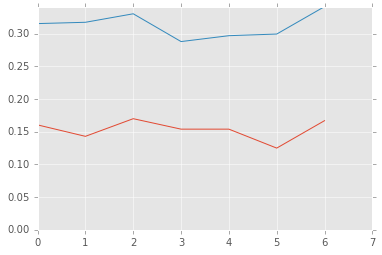

In [155]:
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: `https://plot.ly/settings/api

# create our stacked data manually
y0 = stream_not
y1 = y0 + stream_scaff
capacity = 3*np.ones(100)

# make the mpl plot (no fill yet)
fig, ax = plt.subplots()
ax.plot(y0, label='y0')
ax.plot(y1, label='y1')
ax.plot(capacity, label='capacity')
plt.xlim(0,len(y1))
plt.ylim(0,np.max(y1))
# set all traces' "fill" so that it fills to the next 'y' trace
update = {'data':[{'fill': 'tonexty'}]}

# strip style just lets Plotly make the styling choices (e.g., colors)
# py.plot(fig, update=update, strip_style=True)